In [1]:
import pandas as pd
# General packages
import pandas as pd
import numpy as np
import time

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# sklearn models used below
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# sklearn data splitting
from sklearn.model_selection import train_test_split

# sklearn pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# sklearn hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# sklearn tree plotting
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

# feature importance
from sklearn.inspection import permutation_importance

# sklearn model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay





C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\PeterBaksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

df = pd.read_csv('accelerometer.csv')

In [3]:
df.nunique()

wconfid       3
pctid        17
x          2733
y          2653
z          1808
dtype: int64

Note weight configoration and fan speed. 3 configorations to idnidcate 3 different modes we want to identify. Different fan speeds will add variation



In [4]:
df.head(5000)

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
4995,1,25,1.039,0.109,-0.121
4996,1,25,0.980,0.016,-0.148
4997,1,25,1.051,-0.078,-0.113
4998,1,25,0.992,-0.113,-0.145


In [5]:
df.groupby(by = ['wconfid', 'pctid']).count()

x     y     z
wconfid pctid                  
1       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000
2       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000
3       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000

20ms is the time interval Lets take 1s intervals


In [6]:
1/20e-3

50.0

In [7]:
len(df)

153000

In [8]:
chunks = [df.iloc[i:i+20] for i in range(0, len(df), 20)]


In [9]:
len(chunks)

7650

In [10]:
chunks[0]

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
5,1,20,0.961,0.082,-0.121
6,1,20,0.973,-0.055,-0.109
7,1,20,1.000,0.012,-0.133
8,1,20,0.969,-0.102,-0.141
9,1,20,0.973,-0.059,-0.125


In [11]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from tqdm import tqdm

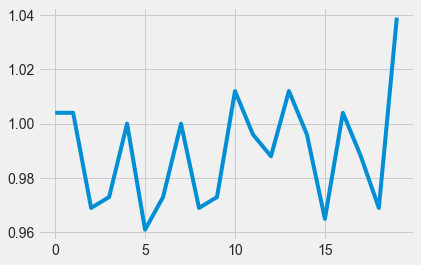

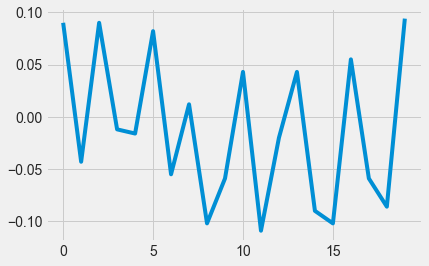

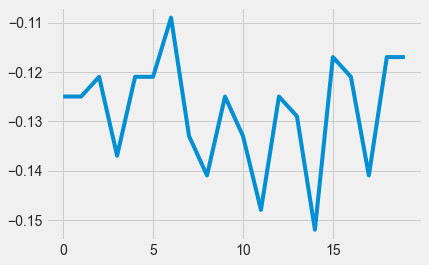

In [12]:
plt.plot(chunks[0].x)
plt.show()
plt.plot(chunks[0].y)
plt.show()
plt.show()
plt.plot(chunks[0].z)

In [13]:
def make_features(chunk):
    features = {}
    for dimension in ['x', 'y', 'z']:
        features[dimension + '_range'] = [chunk[dimension].max() - chunk[dimension].min()]
        features[dimension + '_std']= [chunk[dimension].std()]
        peaks, _ = find_peaks(chunk[dimension])
        features[dimension + '_peak_number'] = [len(peaks)]
        features[dimension + '_sum'] = [chunk[dimension].sum()]
        q1, q3 = np.percentile(chunk[dimension], [25, 75])
        iqr = q3 - q1
        features[dimension + '_iqr'] = [iqr]
        features[dimension + '_kurtosis' ] = [kurtosis(chunk[dimension])]
        coeffs = np.polyfit(range(len(chunk[dimension])), chunk[dimension], 1)
        gradient = coeffs[0]
        features[dimension + '_gradient' ] = [gradient]
        features[dimension + '_skew' ] = [skew(chunk[dimension])]
    features['target'] =  [chunk.iloc[0].wconfid]
    features['pctid'] = [chunk.iloc[0].pctid]

    data = pd.DataFrame(features)
    return data


from tqdm import tqdm

count = 0
for chunk in tqdm(chunks):
    if count == 0:
        dataset = make_features(chunk)
    else:
        dataset = pd.concat([dataset, make_features(chunk)])
    count += 1
    

    
    
    
    

100%|█████████████████████████████████████████████████████████████████████████████| 7650/7650 [00:21<00:00, 364.16it/s]


In [14]:
dataset = dataset.reset_index(drop = True)

In [15]:
dataset

,x_range,x_std,x_peak_number,x_sum,x_iqr,x_kurtosis,x_gradient,x_skew,y_range,y_std,...,z_range,z_std,z_peak_number,z_sum,z_iqr,z_kurtosis,z_gradient,z_skew,target,pctid
0,0.078,0.020380,5,19.795,0.03200,-0.311127,0.000768,0.465517,0.203,0.071256,...,0.043,0.011243,5,-2.558,0.01300,-0.410232,-0.000126,-0.592189,1.0,20.0
1,0.066,0.019461,6,19.874,0.02400,-0.537016,0.000362,0.266744,0.301,0.090933,...,0.051,0.012955,5,-2.672,0.01700,-0.331685,0.000286,-0.622077,1.0,20.0
2,0.074,0.021880,6,19.845,0.03300,-1.179778,-0.000629,0.110855,0.215,0.068597,...,0.043,0.010033,4,-2.503,0.01600,0.712110,0.000387,-0.842140,1.0,20.0
3,0.070,0.018117,6,19.780,0.02000,0.387969,-0.000114,0.680020,0.254,0.077784,...,0.035,0.011874,7,-2.719,0.02075,-1.233422,0.000130,-0.202188,1.0,20.0
4,0.078,0.024206,7,19.979,0.04375,-1.188863,-0.000977,0.440803,0.281,0.080164,...,0.047,0.012278,6,-2.546,0.01300,-0.445733,0.000362,-0.410891,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,0.589,0.145966,4,19.379,0.14900,0.040616,-0.000014,0.202463,0.395,0.123512,...,0.867,0.224650,7,-2.097,0.28450,-0.298465,-0.004068,0.358114,3.0,100.0
7646,0.415,0.127480,7,20.345,0.14375,-0.645747,-0.000162,0.663387,0.481,0.166950,...,0.773,0.241753,7,-3.101,0.25600,-0.658792,-0.003234,0.393506,3.0,100.0
7647,0.567,0.152396,6,19.343,0.15750,-0.334781,-0.005192,0.346020,0.512,0.173865,...,0.867,0.213365,7,-1.992,0.31400,-0.433138,0.003504,0.094306,3.0,100.0
7648,0.547,0.117977,6,19.501,0.11400,0.934923,0.005276,-0.420593,0.500,0.137050,...,0.793,0.196131,6,-2.423,0.15450,0.195670,-0.005001,0.364636,3.0,100.0


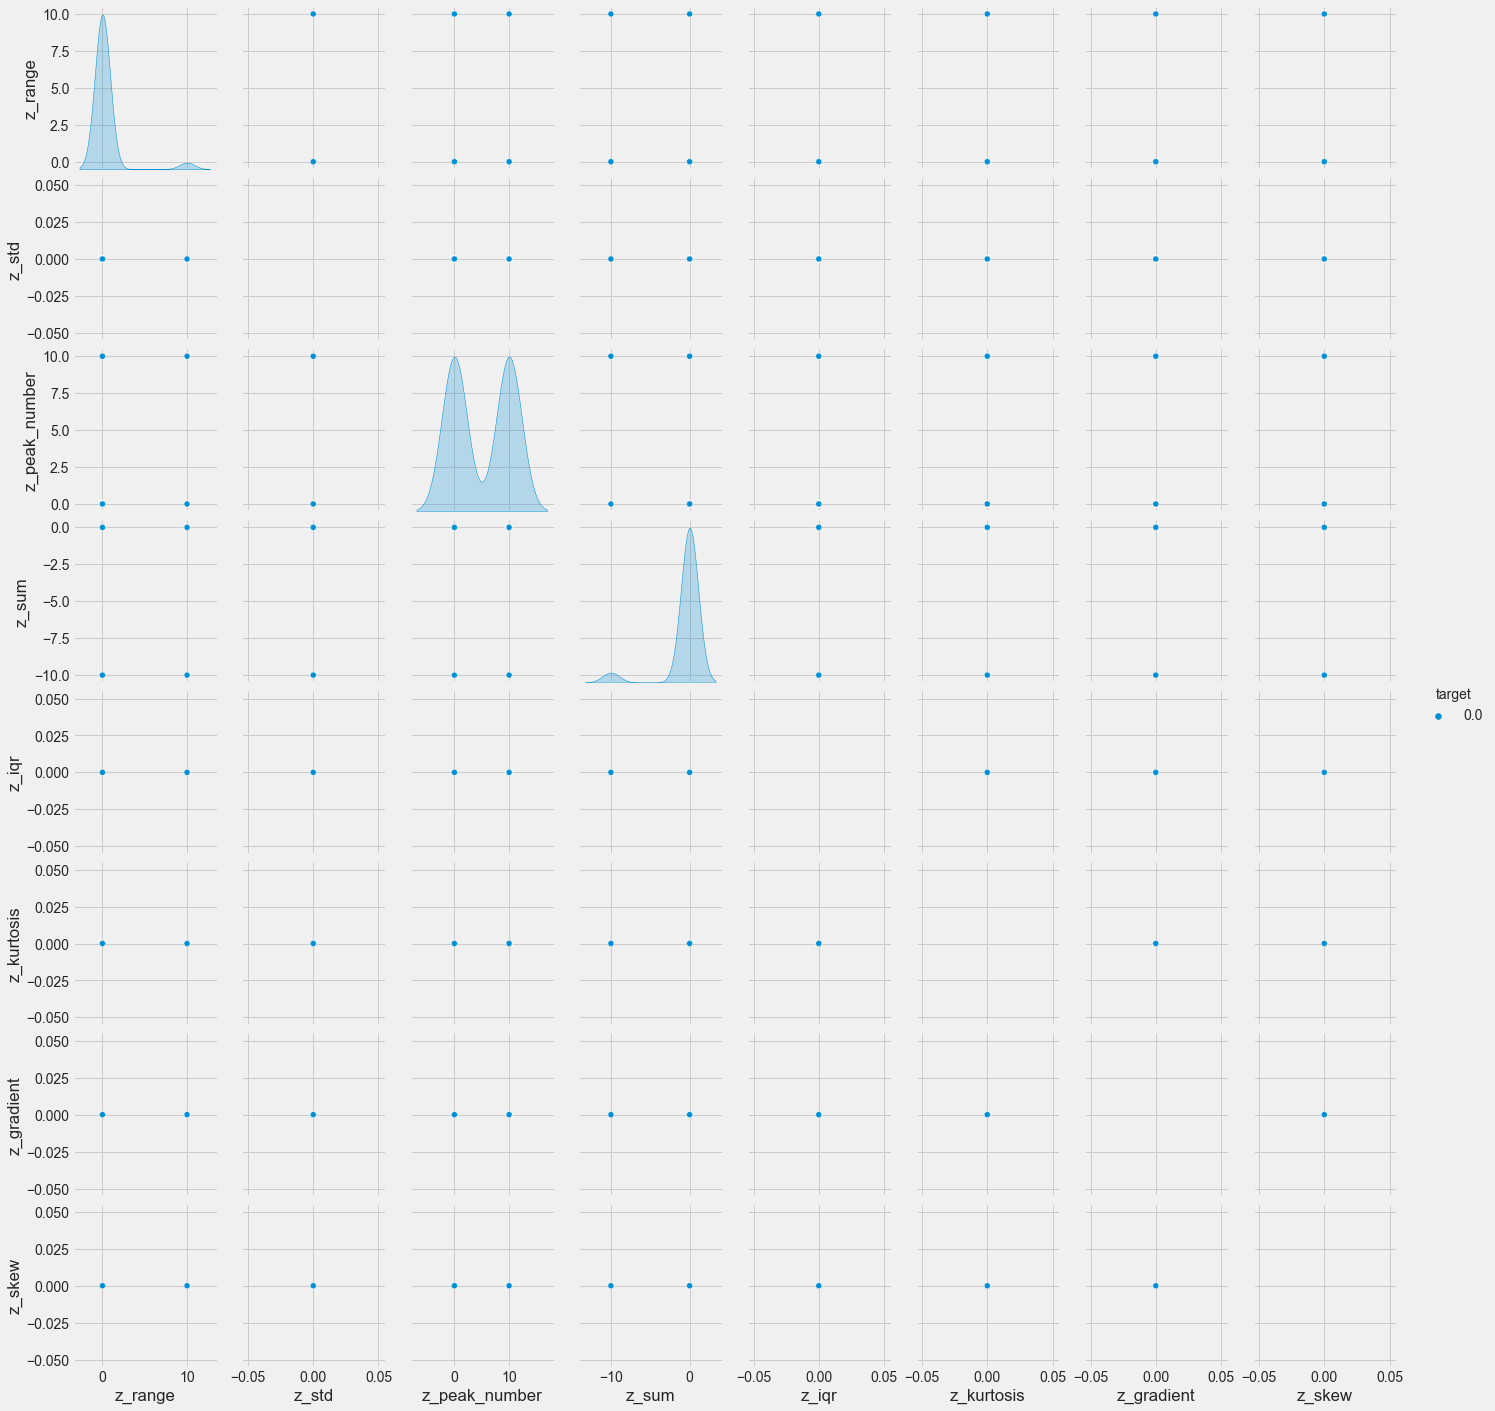

In [16]:
import seaborn as sns

sample = dataset.sample(50)
sample = sample.round(-1)
# assuming your DataFrame is named `df` and the column to use for color is named `color_col`
sns.pairplot(sample.iloc[:, -10:-1], hue="target")
plt.show()

# sns_plot = sns.pairplot(sample.iloc[:, 0:5], size=2.0)
# sns_plot.savefig("pairplot.png")

# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png') # Show pairplot as image

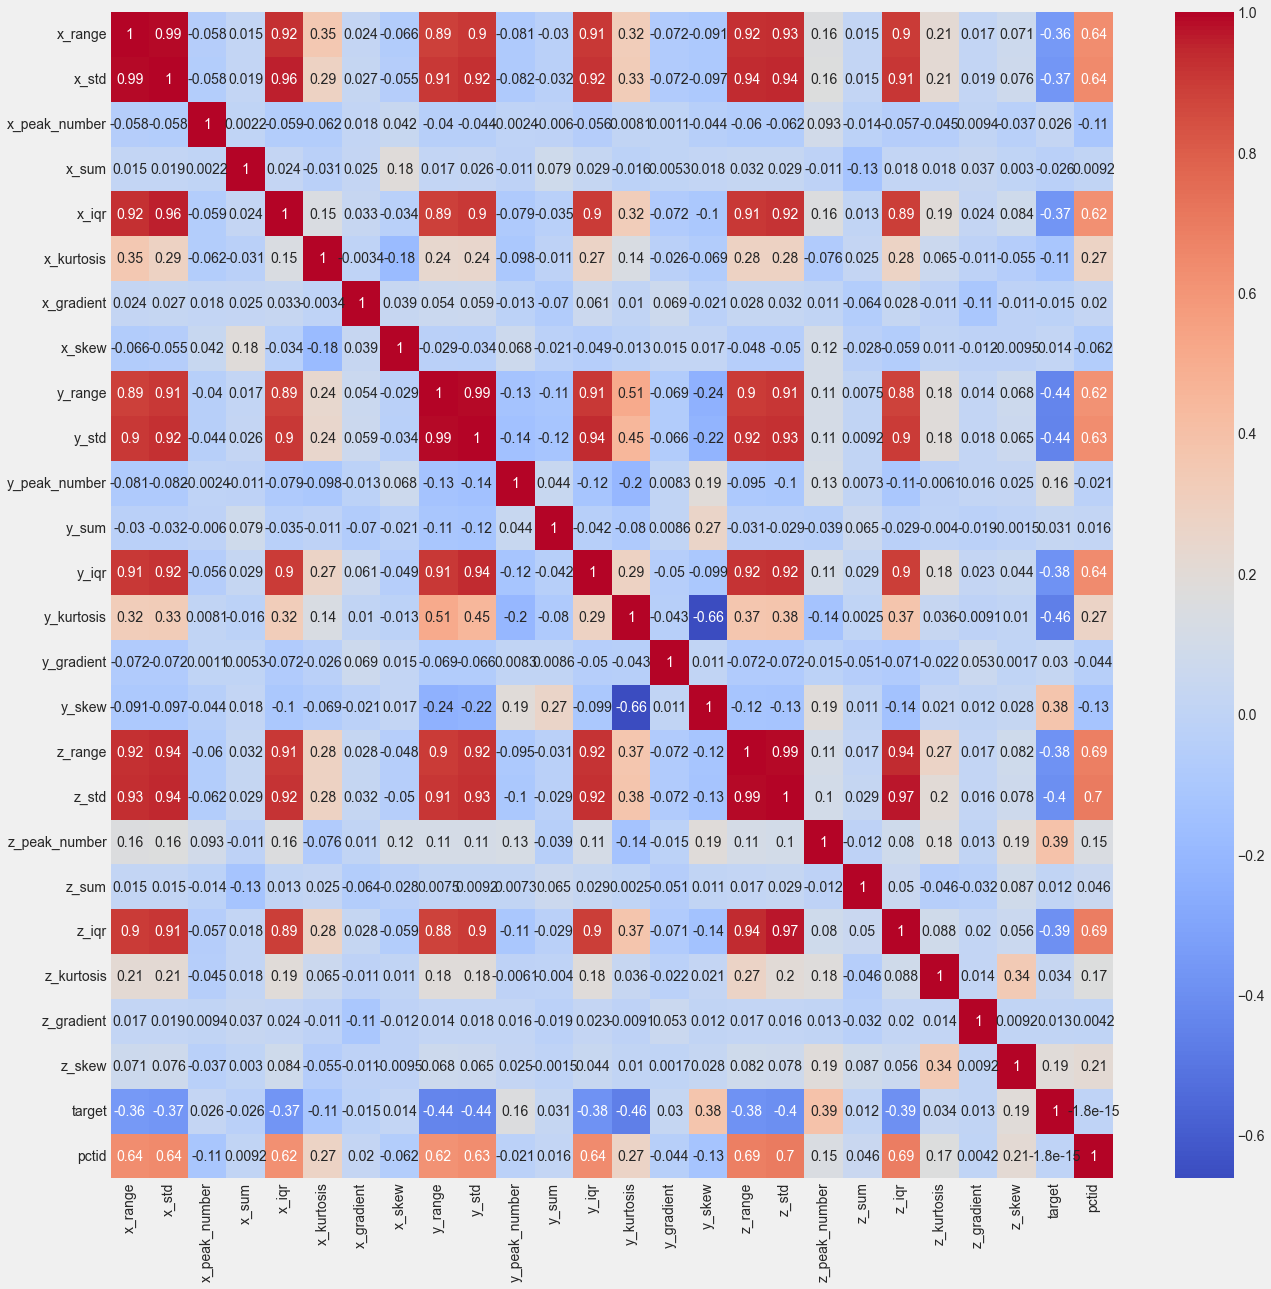

In [17]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
fig = plt.gcf()
fig.set_size_inches(20, 20)

In [18]:
dataset.head()

,x_range,x_std,x_peak_number,x_sum,x_iqr,x_kurtosis,x_gradient,x_skew,y_range,y_std,...,z_range,z_std,z_peak_number,z_sum,z_iqr,z_kurtosis,z_gradient,z_skew,target,pctid
0,0.078,0.020380,5,19.795,0.03200,-0.311127,0.000768,0.465517,0.203,0.071256,...,0.043,0.011243,5,-2.558,0.01300,-0.410232,-0.000126,-0.592189,1.0,20.0
1,0.066,0.019461,6,19.874,0.02400,-0.537016,0.000362,0.266744,0.301,0.090933,...,0.051,0.012955,5,-2.672,0.01700,-0.331685,0.000286,-0.622077,1.0,20.0
2,0.074,0.021880,6,19.845,0.03300,-1.179778,-0.000629,0.110855,0.215,0.068597,...,0.043,0.010033,4,-2.503,0.01600,0.712110,0.000387,-0.842140,1.0,20.0
3,0.070,0.018117,6,19.780,0.02000,0.387969,-0.000114,0.680020,0.254,0.077784,...,0.035,0.011874,7,-2.719,0.02075,-1.233422,0.000130,-0.202188,1.0,20.0
4,0.078,0.024206,7,19.979,0.04375,-1.188863,-0.000977,0.440803,0.281,0.080164,...,0.047,0.012278,6,-2.546,0.01300,-0.445733,0.000362,-0.410891,1.0,20.0


C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_12740\335245071.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure() #this creates a new figure on which your plot will appear


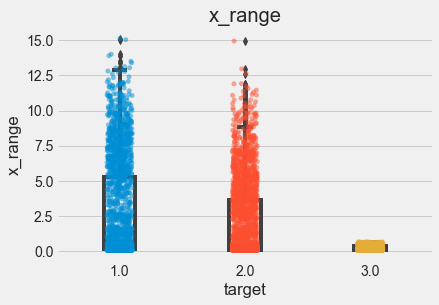

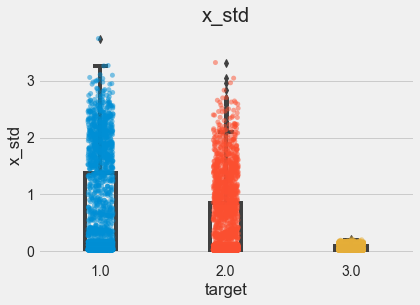

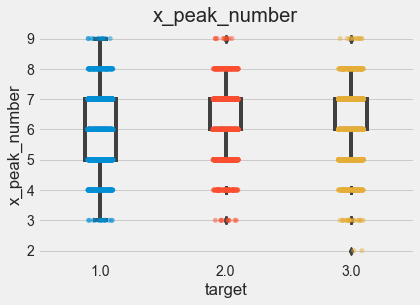

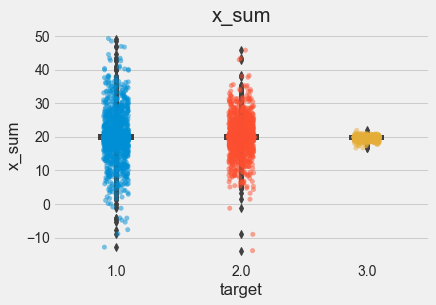

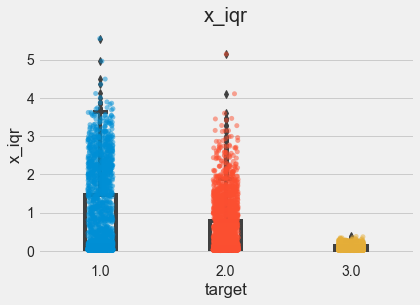

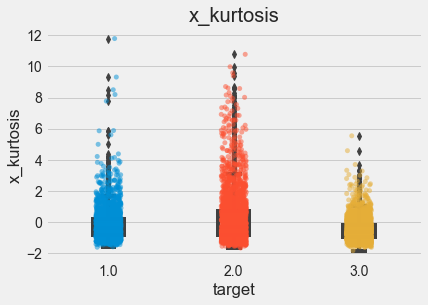

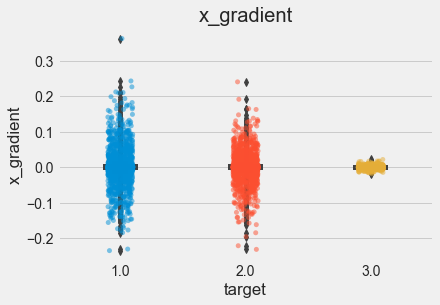

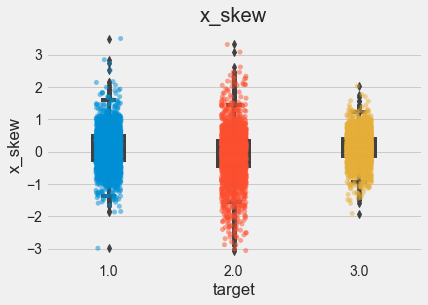

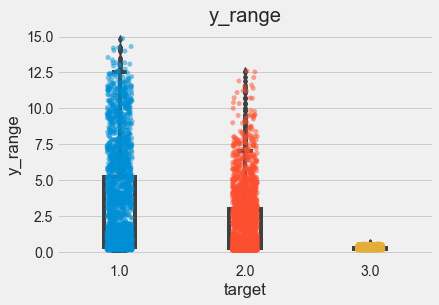

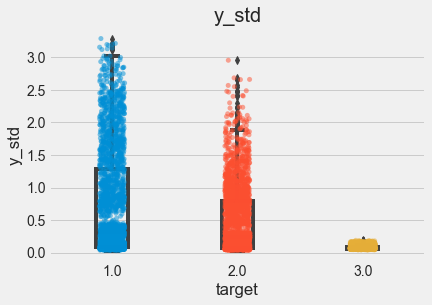

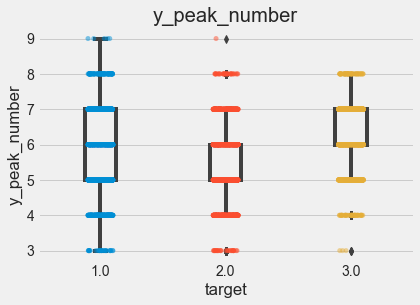

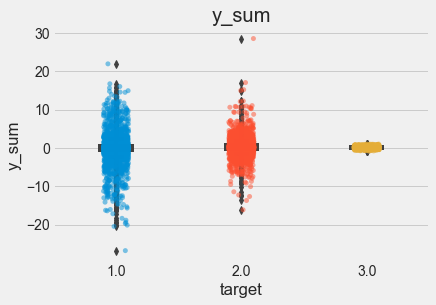

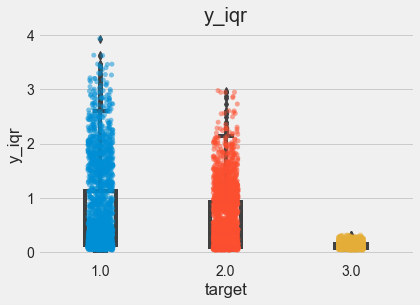

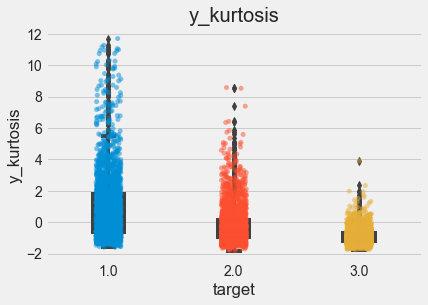

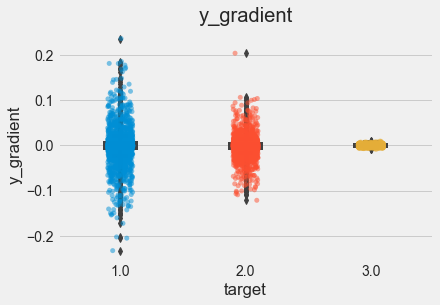

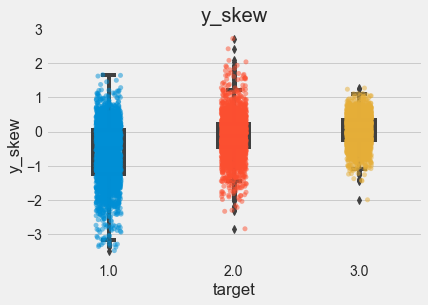

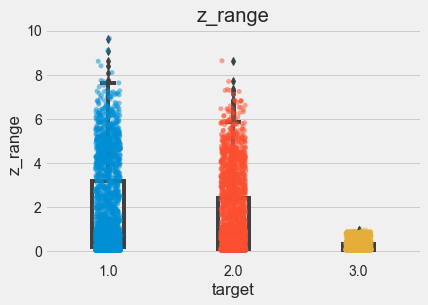

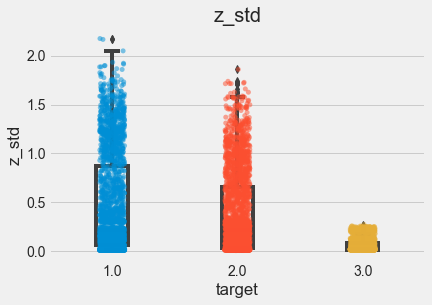

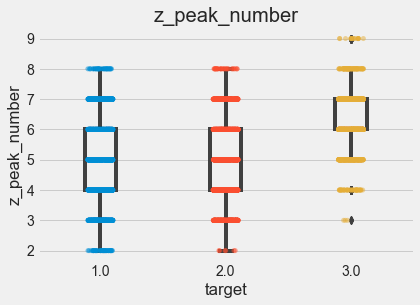

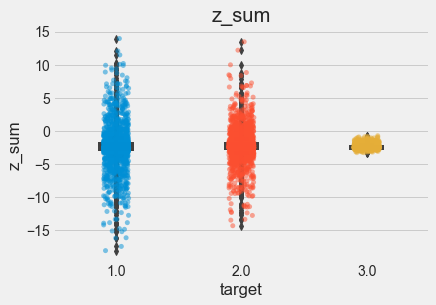

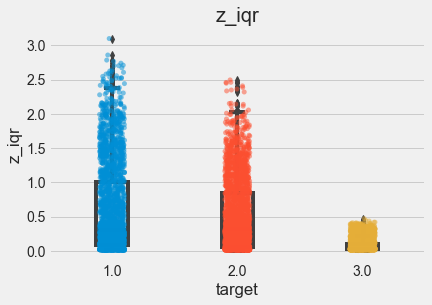

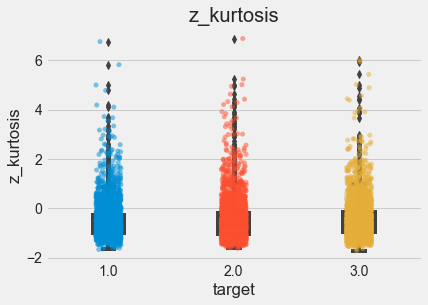

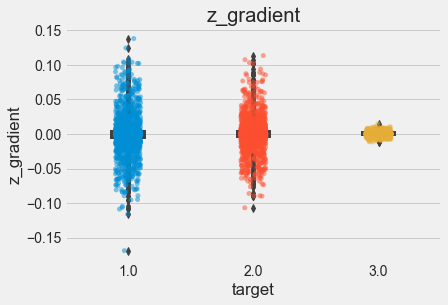

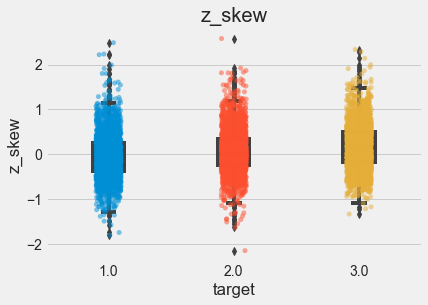

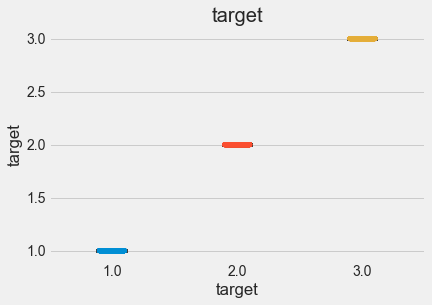

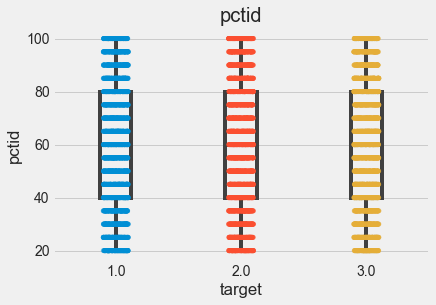

In [19]:
for var in dataset.columns:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.boxplot(data=dataset,x='target', y=var,width=0.25,boxprops=dict(facecolor=(0,0,0,0)))
    sns.stripplot(data=dataset, x='target', y=var, alpha =0.5);
    plt.title(var)

In [20]:
dataset.head(2)


,x_range,x_std,x_peak_number,x_sum,x_iqr,x_kurtosis,x_gradient,x_skew,y_range,y_std,...,z_range,z_std,z_peak_number,z_sum,z_iqr,z_kurtosis,z_gradient,z_skew,target,pctid
0,0.078,0.020380,5,19.795,0.032,-0.311127,0.000768,0.465517,0.203,0.071256,...,0.043,0.011243,5,-2.558,0.013,-0.410232,-0.000126,-0.592189,1.0,20.0
1,0.066,0.019461,6,19.874,0.024,-0.537016,0.000362,0.266744,0.301,0.090933,...,0.051,0.012955,5,-2.672,0.017,-0.331685,0.000286,-0.622077,1.0,20.0


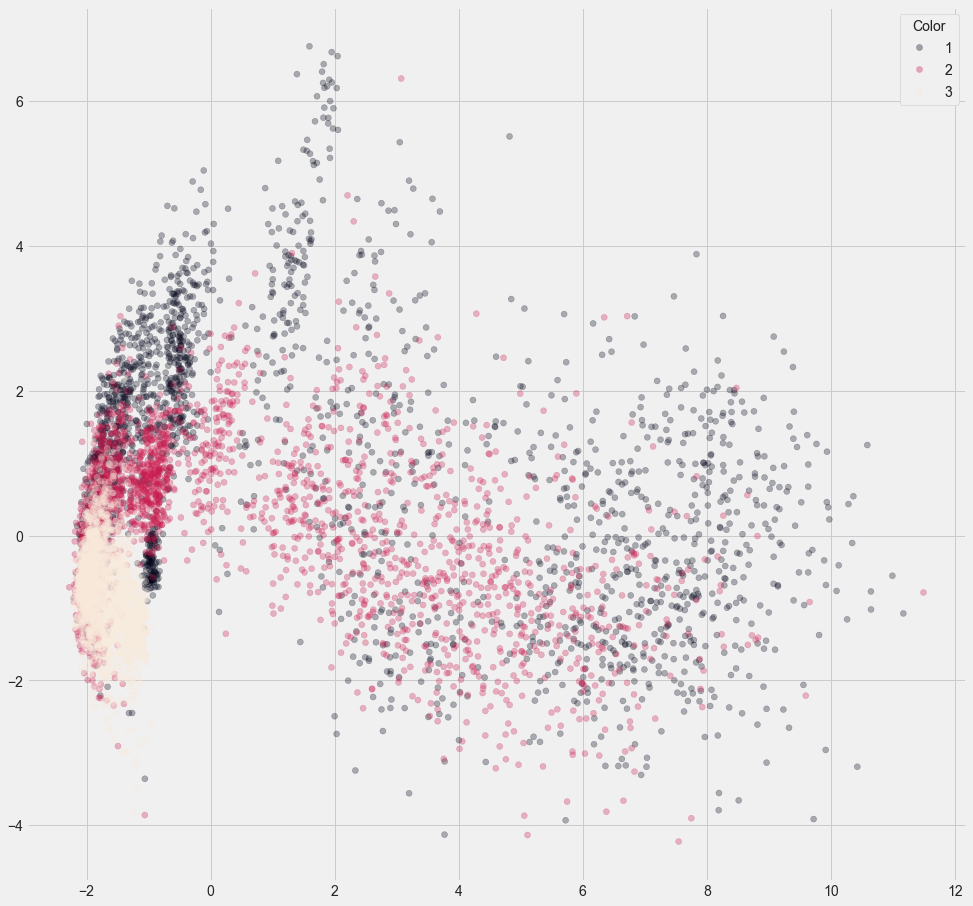

[0.36483423 0.07871621 0.05830025 0.05449271 0.04717077 0.04632298
 0.04488707 0.04120102 0.04088878 0.03608722 0.03502708 0.03433248
 0.03083211 0.02867141 0.02501323 0.0122387  0.00717424 0.00658523
 0.00246363 0.00241907]


Text(0.5, 1.0, 'PCA Explained Ratio')

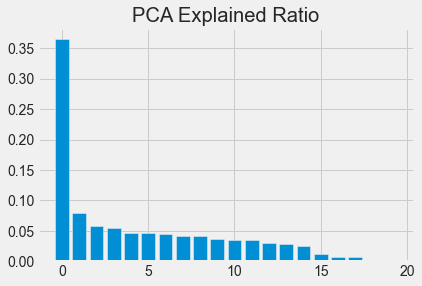

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:, :-2])
# assuming your DataFrame is named `df`
pca = PCA(n_components=20)  # initialize PCA with 2 components
principal_components = pca.fit_transform(scaled_data)  # fit and transform the data
principal_components = principal_components[:, 0:2]
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # create a new DataFrame with the principal components



fig, ax = plt.subplots(figsize = (15, 15))
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], c=dataset['target'], alpha = 0.3)
legend = ax.legend(*scatter.legend_elements(),
                   loc="upper right", title="Color")
ax.add_artist(legend)

plt.show()
explained_variances = pca.explained_variance_ratio_
print(explained_variances)


plt.bar(range(20), explained_variances)
plt.title('PCA Explained Ratio')

In [22]:
principal_components.shape

(7650, 2)

In [23]:
len(dataset)

7650

Are we going to have possibl very similar examples due to the sample.. Maybe remove some data before we do this

In [24]:
import random
pc = dataset.pctid.unique()

count = 0

for t in [1,2,3]:
    t = float(t)
    sample = random.choices(pc, k=4)

    
    for p in pc:
        if count == 0:
            if p in sample:
                temp_df_test = dataset[(dataset.pctid == p) & (dataset.target == t)]
                df_test = temp_df_test
                print(len(df_test))
                count += 1
            # else:
            #     temp_df_train = dataset[(dataset.pctid != p) & (dataset.target == t)]
            #     df_train = temp_df_test
        else:
            if p in sample:
                temp_df_test = dataset[(dataset.pctid == p) & (dataset.target == t)]
                df_test = pd.concat([df_test, temp_df_test], ignore_index=False)
            # else:
            #     temp_df_train = dataset[(dataset.pctid != p) & (dataset.target == t)]
            #     df_train = pd.concat([df_train, temp_df_test])
        
        

150


In [25]:
 len(df_test)

1650

In [26]:
# assuming `df1` and `df2` are your DataFrames
df1_indices = set(df_test.index)
df2_indices = set(dataset.index)
indices_not_in_df1 = df2_indices - df1_indices


In [27]:
df_train = dataset.iloc[list(indices_not_in_df1), :]

In [28]:
len(df_train) , len(df_test) , len(df_train) + len(df_test) 

(6000, 1650, 7650)

In [29]:
X_train = df_train.iloc[:, :-2]
X_test = df_test.iloc[:, :-2]
y_train = df_train['target']
y_test = df_test['target']

In [49]:
# Define the decistion tree and its hyperparmeters
clf1 = DecisionTreeClassifier()
# Fit the above decision tee to the training data
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

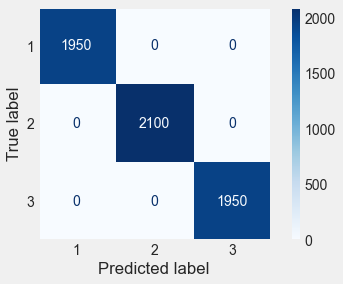

In [50]:
ConfusionMatrixDisplay.from_estimator(clf1, X_train, y_train,cmap=plt.cm.Blues)
plt.grid(False);

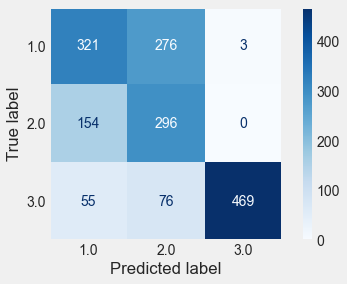

In [51]:
ConfusionMatrixDisplay.from_estimator(clf1, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False);

In [70]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7],       # increase the range up to 10
              'min_samples_leaf': range(1,10)} # increase the range up to 30

cv = StratifiedKFold(n_splits=5) #"Generate test sets such that all contain the same distribution of classes, or as close as possible." https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold

tree= DecisionTreeClassifier()
grid1 = GridSearchCV(tree,
                    param_grid=param_grid,
                    cv=cv,
                    verbose=1,
                    refit=True, # Refits the best model on all the training data so you can use grid1 to make predictions (default argument)
                    n_jobs=-1, # -1 means using all processors
                    scoring='accuracy') # https://scikit-learn.org/stable/modules/model_evaluation.html
grid1.fit(X_train,y_train)                    

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': range(1, 10)},
             scoring='accuracy', verbose=1)

In [71]:
grid1_results = pd.DataFrame.from_dict(grid1.cv_results_)
grid1_results.sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.073218,0.007983,0.001425,0.000995,7,1,"{'max_depth': 7, 'min_samples_leaf': 1}",0.550833,0.607500,0.696667,0.756667,0.512500,0.624833,0.090482,1
27,0.053762,0.003795,0.002013,0.003117,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",0.482500,0.539167,0.727500,0.768333,0.601667,0.623833,0.108869,2
28,0.054625,0.003458,0.001808,0.002722,5,2,"{'max_depth': 5, 'min_samples_leaf': 2}",0.482500,0.539167,0.723333,0.768333,0.601667,0.623000,0.108085,3
46,0.074006,0.005955,0.003784,0.003405,7,2,"{'max_depth': 7, 'min_samples_leaf': 2}",0.548333,0.600000,0.692500,0.760833,0.510833,0.622500,0.092209,4
49,0.073605,0.007547,0.003812,0.002505,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.544167,0.602500,0.689167,0.759167,0.510833,0.621167,0.091781,5


In [33]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [66]:
y_train = y_train.astype('int')
X_train.head()
X_train.shape

(6000, 24)

In [67]:
dt_params = {'max_depth' : range(2,8, 2),  'min_samples_leaf': range(5,10, 2)}

svm_params ={'C': [ 1, 0.01, 0.0001],
             'gamma': ['scale', 'auto'],
             'kernel': ['linear', 'rbf']}
rf_params = {'n_estimators': [10, 100, 300],
             'max_depth': [5, 10, 15],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [ 1, 3, 5]}
gb_params = {
    "n_estimators": [1, 5, 10, 50, 200],
    "max_leaf_nodes": [2, 5, 10],
    "learning_rate": [0.01, 0.1, 1]}            

log_r_params = {'penalty': ['l1', 'l2', 'none'],
         'C': [ 1, 0.01, 0.0001]}

xgb_params = {'gamma': [0,1],
              'learning_rate': [0.01,0.1, 1],
              'max_depth': [5,10, 15]}
              # 'n_estimators': [50,100, 150],
              # 'reg_alpha': [0,0.1,1, 50, 100],
              # 'reg_lambda': [0,0.1,1, 100]}
            
knn_params = {'n_neighbors' : [1, 3, 5, 7, 9, 15, 19]}



In [90]:
algorithms = {'log_reg': [LogisticRegression(), False, log_r_params],
              'DT' :[DecisionTreeClassifier(), False, dt_params],
              'svm': [svm.SVC(), True,  svm_params],
             'RF': [RandomForestClassifier(), False, rf_params]}
             # 'gradeint boosting' : [GradientBoostingClassifier(),False,  gb_params],
             # 'xgb': [xgb.XGBClassifier(), False,  xgb_params]}
             # 'knn':[KNeighborsClassifier(), True, knn_params]} 

results = pd.DataFrame(columns = [ 'name', 'params', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall'])


for i in tqdm(range(len(list(algorithms.keys())))):
    alg = list(algorithms.keys())[i]
    print('staring :', alg)
    clf = algorithms[alg][0]
    param_grid = algorithms[alg][2]
    print(param_grid)
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=42)
    grid1 = GridSearchCV(clf,
                    param_grid=param_grid,
                    cv=cv,
                    verbose=1,
                    refit=False, # Refits the best model on all the training data so you can use grid1 to make predictions (default argument)
                    n_jobs=-1, # -1 means using all processors
                    scoring=['accuracy'])
    normalisation = algorithms[alg][1]
    if normalisation:
        scaler.fit(X_train)
        grid1.fit(scaler.transform(X_train), y_train)  
    else:
        print('no normalisation')
        grid1.fit(X_train, y_train)  
        
    grid1_results = pd.DataFrame.from_dict(grid1.cv_results_)
    grid1_results = grid1_results[['params', 'mean_test_accuracy']].sort_values(
        by = 'mean_test_accuracy', ascending = False).reset_index(drop = True)
    grid1_results['name'] = pd.DataFrame([alg]*len(grid1_results))
    results = pd.concat([results, grid1_results]).sort_values(
        by = 'mean_test_f1', ascending = False).reset_index(drop = True)
    results.reset_index(drop = True, inplace = True)
    print('completed: ', alg)
print('fitted all models and parameters')
    

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

staring : log_reg
{'penalty': ['l1', 'l2', 'none'], 'C': [1, 0.01, 0.0001]}
no normalisation
Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.59it/s]

completed:  log_reg
staring : DT
{'max_depth': range(2, 8, 2), 'min_samples_leaf': range(5, 10, 2)}
no normalisation
Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  4.14it/s]

completed:  DT
staring : svm
{'C': [1, 0.01, 0.0001], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:10<00:04,  4.48s/it]

completed:  svm
staring : RF
{'n_estimators': [10, 100, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
no normalisation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:07<00:00, 16.95s/it]

completed:  RF
fitted all models and parameters


In [91]:
results.sort_values(by = 'mean_test_accuracy', ascending = False)

,name,params,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
30,RF,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.920667,NaN,NaN,NaN
31,RF,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.920333,NaN,NaN,NaN
32,RF,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.918667,NaN,NaN,NaN
33,RF,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.917833,NaN,NaN,NaN
34,RF,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.917667,NaN,NaN,NaN
...,...,...,...,...,...,...
29,svm,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'rbf'}",0.35,NaN,NaN,NaN
28,svm,"{'C': 0.0001, 'gamma': 'scale', 'kernel': 'rbf'}",0.35,NaN,NaN,NaN
6,log_reg,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN
7,log_reg,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


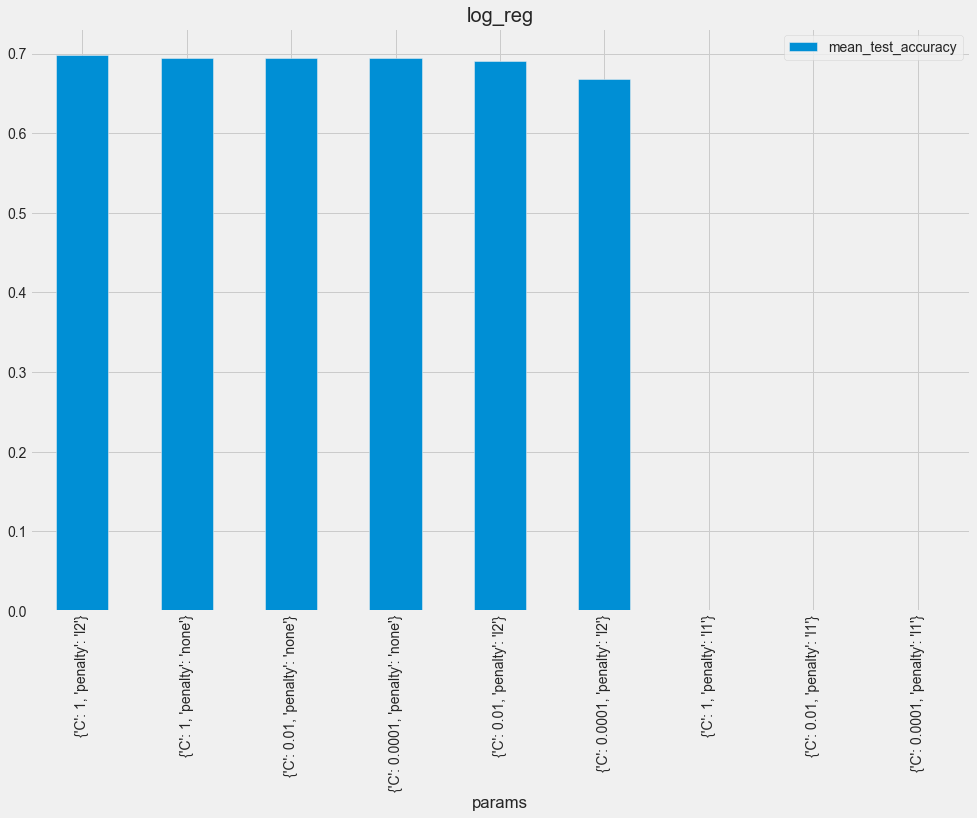

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


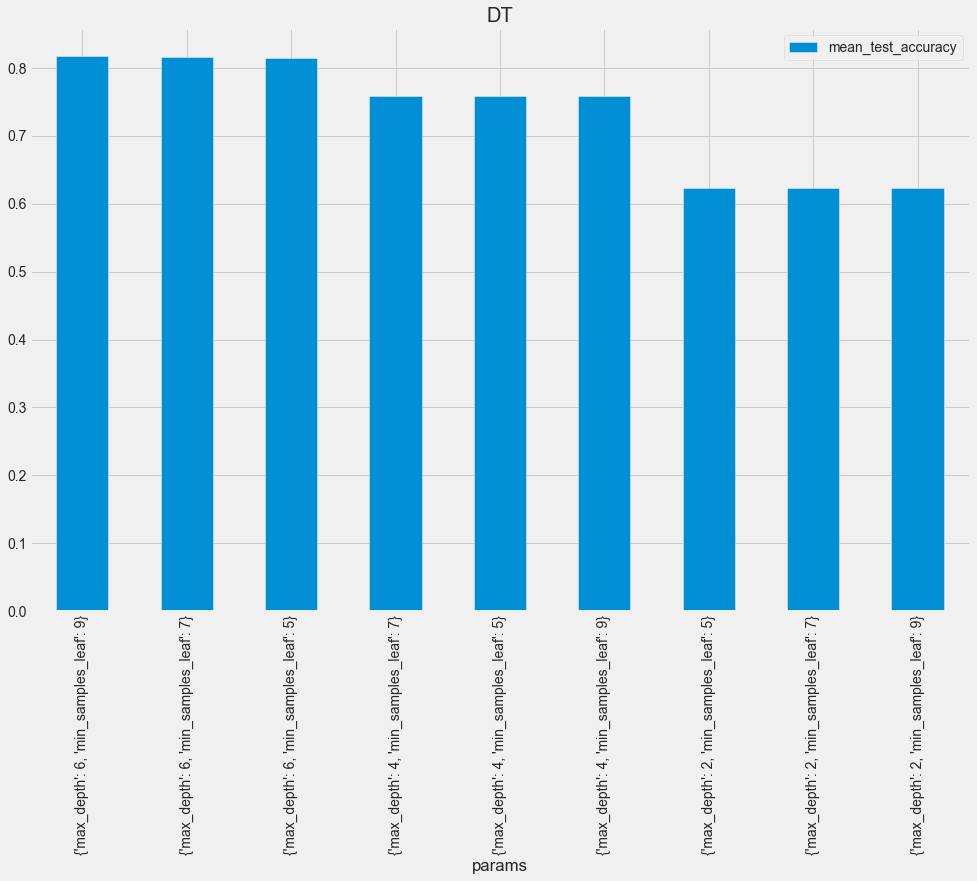

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


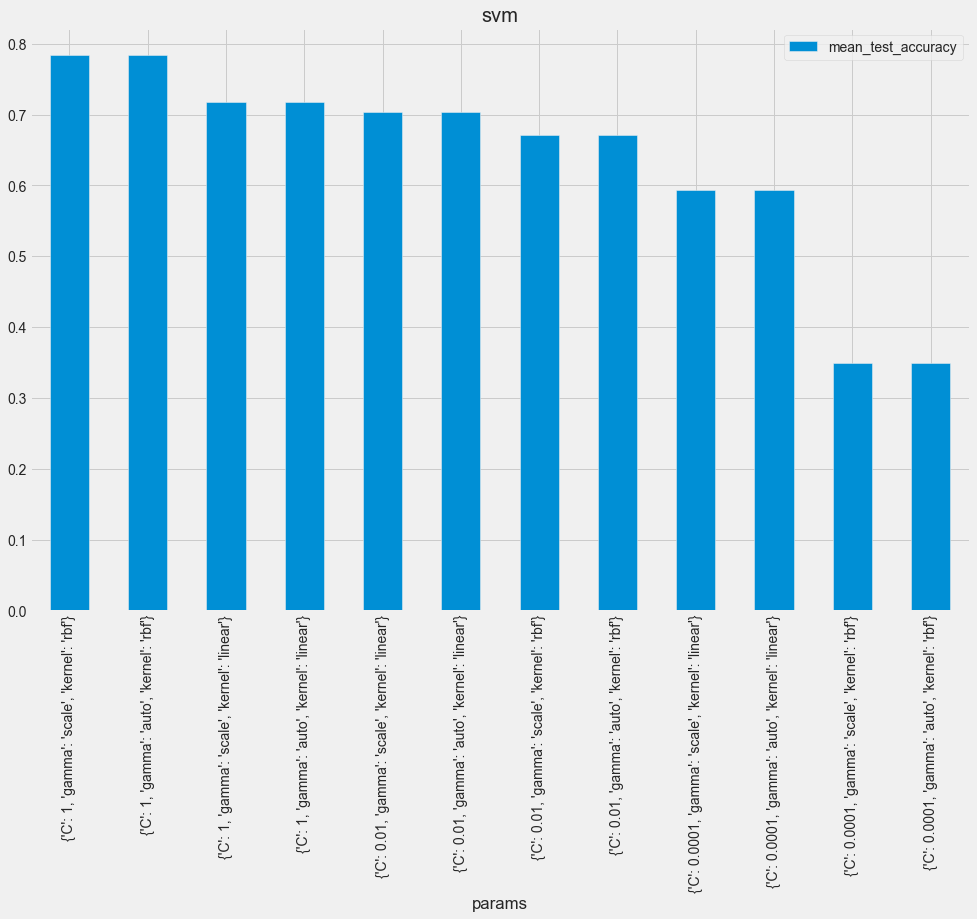

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

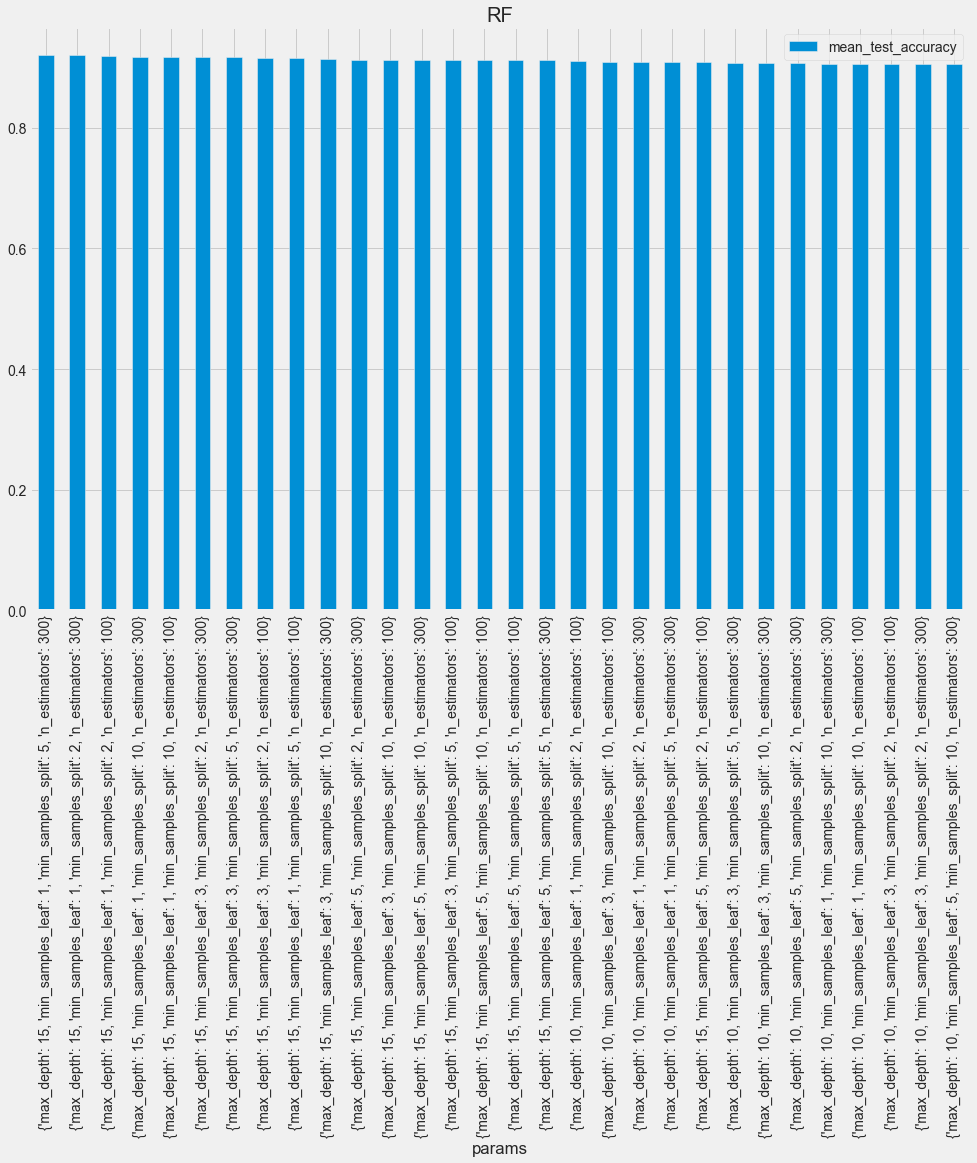

In [92]:
for alg in list(results.name.unique()):
    plt_df = results[results['name'] == alg]
    plt_df = plt_df.head(30)
    plt_df.plot(kind  = 'bar', x = str('params'), y = 'mean_test_accuracy')
    xlocs, xlabs = plt.xticks()
    xlocs=[i+1 for i in range(0,len(plt_df))]
    xlabs=[i/2 for i in range(0,len(plt_df))]
    for i, v in enumerate(plt_df.mean_test_f1):
        plt.text(xlocs[i]-1.5, v , str(v)[0:4])
    plt.title(alg)
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()
    

In [101]:
best_params = results.sort_values(by = 'mean_test_accuracy', ascending = False).iloc[0]
final = RandomForestClassifier(**best_params.params)
final.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

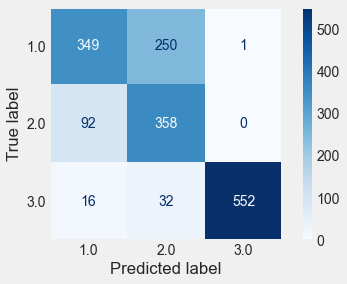

In [102]:
ConfusionMatrixDisplay.from_estimator(final, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False);

In [104]:
y_pred = final.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.58      0.66       600
         2.0       0.56      0.80      0.66       450
         3.0       1.00      0.92      0.96       600

    accuracy                           0.76      1650
   macro avg       0.77      0.77      0.76      1650
weighted avg       0.79      0.76      0.77      1650

